In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from src.utils.plotting import plot_runtime
from src.utils.config import SEEDS, L2_REG

In [12]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams["axes.labelsize"] = 34
mpl.rcParams['legend.fontsize'] = 28
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['text.usetex'] = True

In [13]:
seeds = SEEDS
l2_reg = L2_REG

### UCI Run Time

In [4]:
plot_cfgs = [
    {
        "optimizer": "sgd",
        "label": "SGD",
        "color": "black",
        "linestyle": "solid",
        "marker": "o",
    },
    {
        "optimizer": "srda",
        "label": "SRDA",
        "color": "tab:blue",
        "linestyle": "solid",
        "marker": "+",
    },
    {
        "optimizer": "lsvrg",
        "label": "LSVRG (Non-Uniform)",
        "color": "tab:red",
        "linestyle": "solid",
        "marker": "s",
    },
    {
        "optimizer": "lsvrg_uniform",
        "label": "LSVRG (Uniform)",
        "color": "purple",
        "linestyle": "solid",
        "marker": "^",
    },
]

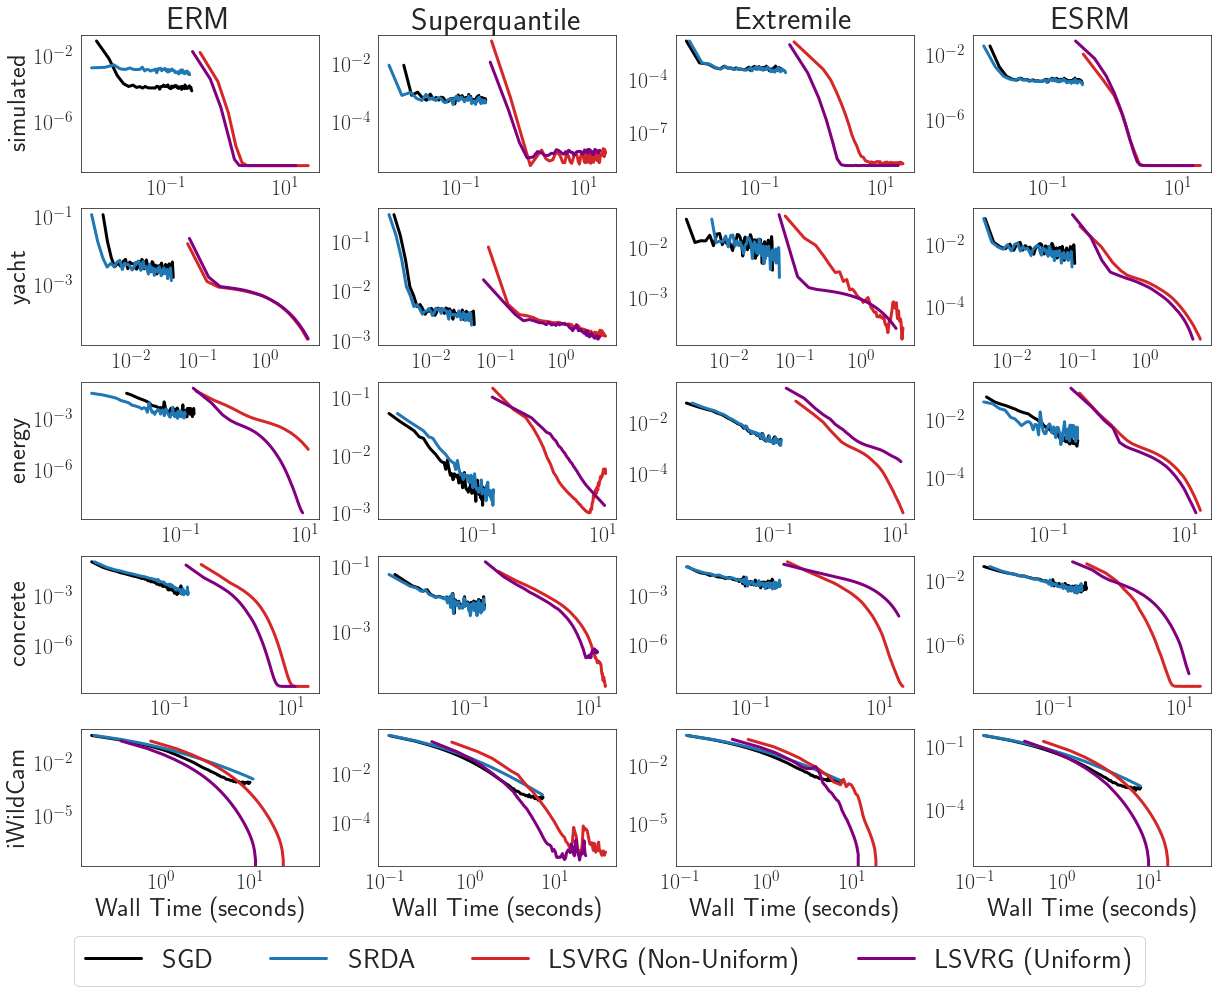

In [5]:
sns.set_style("white")

fig, axes = plt.subplots(5, 4, figsize=(17, 13))

datasets = ["simulated", "yacht", "energy", "concrete", "iwildcam"]
objectives = ["erm", "superquantile", "extremile", "esrm"]

for i, dataset in enumerate(datasets):
    for j, objective in enumerate(objectives):
        if dataset == "iwildcam":
            if objective == "erm":
                model_cfg = {"objective": objective, "l2_reg": l2_reg, "loss": "multinomial_cross_entropy", "n_class": 60}
            else:
                model_cfg = {"objective": objective + "_lite", "l2_reg": l2_reg, "loss": "multinomial_cross_entropy", "n_class": 60}
        else:
            model_cfg = {"objective": objective, "l2_reg": l2_reg, "loss": "squared_error", "n_class": None}
        for plot_cfg in plot_cfgs:
            plot_runtime(axes[i, j], dataset, model_cfg, plot_cfg, seeds)
        if i != 3:
            axes[i, j].set_xticks([])
        axes[i, j].set_yscale("log")
        axes[i, j].set_xscale("log")

axes[0, 0].set_title("ERM")
axes[0, 1].set_title("Superquantile")
axes[0, 2].set_title("Extremile")
axes[0, 3].set_title("ESRM")

axes[4, 0].set_xlabel("Wall Time (seconds)", fontsize=26)
axes[4, 1].set_xlabel("Wall Time (seconds)", fontsize=26)
axes[4, 2].set_xlabel("Wall Time (seconds)", fontsize=26)
axes[4, 3].set_xlabel("Wall Time (seconds)", fontsize=26)

axes[0, 0].set_ylabel("simulated", fontsize=26)
axes[1, 0].set_ylabel("yacht", fontsize=26)
axes[2, 0].set_ylabel("energy", fontsize=26)
axes[3, 0].set_ylabel("concrete", fontsize=26)
axes[4, 0].set_ylabel("iWildCam", fontsize=26)

handles, labels = axes[2, 2].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center',
        bbox_to_anchor=(0.5, -0.03), ncol=4)
fig.tight_layout(pad=1.0)
plt.savefig(f"../figures/runtime_curves_{l2_reg}.pdf", bbox_inches="tight")
plt.show()

### iWildCam Run Time

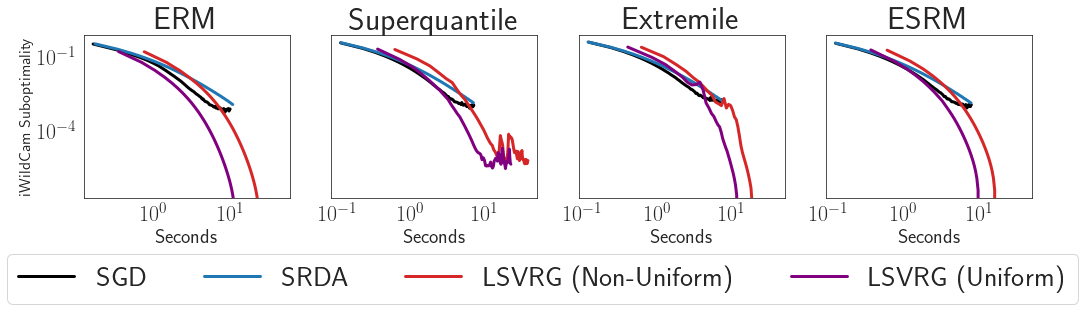

In [6]:
sns.set_style("white")

fig, axes = plt.subplots(1, 4, figsize=(17, 3), sharey=True)

dataset = "iwildcam"
objectives = [
    "erm", 
    "superquantile_lite", 
    "extremile_lite", 
    "esrm_lite"
]


for j, objective in enumerate(objectives):
    model_cfg = {"objective": objective, "l2_reg": l2_reg, "loss": "multinomial_cross_entropy", "n_class": 60}
    for plot_cfg in plot_cfgs:
        plot_runtime(axes[j], dataset , model_cfg, plot_cfg, seeds)
    axes[j].set_yscale("log")
    axes[j].set_xscale("log")

axes[0].set_title("ERM")
axes[1].set_title("Superquantile")
axes[2].set_title("Extremile")
axes[3].set_title("ESRM")

axes[0].set_xlabel("Seconds", fontsize=20)
axes[1].set_xlabel("Seconds", fontsize=20)
axes[2].set_xlabel("Seconds", fontsize=20)
axes[3].set_xlabel("Seconds", fontsize=20)

axes[0].set_ylabel("iWildCam Suboptimality", fontsize=16)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center',
            bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.savefig("../figures/iwildcam_runtime.pdf", bbox_inches="tight")
plt.show()

### UCI Run Time (Individual)

In [7]:
plot_cfgs = [
    {
        "optimizer": "srda",
        "label": "SRDA",
        "color": "tab:blue",
        "linestyle": "solid",
        "marker": "+",
    },
    {
        "optimizer": "sgd",
        "label": "SGD",
        "color": "black",
        "linestyle": "solid",
        "marker": "o",
    },
    {
        "optimizer": "lsvrg",
        "label": "LSVRG",
        "color": "tab:red",
        "linestyle": "solid",
        "marker": "s",
    },
    # {
    #     "optimizer": "lsvrg_uniform",
    #     "label": "LSVRG (Uniform)",
    #     "color": "purple",
    #     "linestyle": "solid",
    #     "marker": "^",
    # },
]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


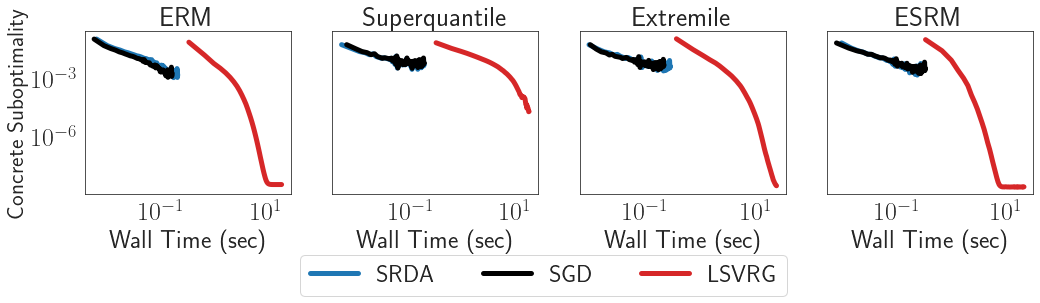

In [14]:
sns.set_style("white")

fig, axes = plt.subplots(1, 4, figsize=(17, 3), sharey=True)

dataset = "concrete"
objectives = [
    "erm", 
    "superquantile", 
    "extremile", 
    "esrm"
]


for j, objective in enumerate(objectives):
    model_cfg = {"objective": objective, "l2_reg": l2_reg, "loss": "squared_error", "n_class": None}
    for plot_cfg in plot_cfgs:
        plot_runtime(axes[j], dataset , model_cfg, plot_cfg, seeds)
    axes[j].set_yscale("log")
    axes[j].set_xscale("log")

axes[0].set_title("ERM", fontsize=27)
axes[1].set_title("Superquantile", fontsize=27)
axes[2].set_title("Extremile", fontsize=27)
axes[3].set_title("ESRM", fontsize=27)

axes[0].set_xlabel("Wall Time (sec)", fontsize=25)
axes[1].set_xlabel("Wall Time (sec)", fontsize=25)
axes[2].set_xlabel("Wall Time (sec)", fontsize=25)
axes[3].set_xlabel("Wall Time (sec)", fontsize=25)

axes[0].set_ylabel("Concrete Suboptimality", fontsize=23)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center',
            bbox_to_anchor=(0.5, -0.25), ncol=4, fontsize=24)
plt.savefig("../figures/concrete_runtime.eps", bbox_inches="tight")
plt.show()